In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Baca data dari file CSV
file_path_01 = '/datasets/project_sql_result_01.csv'
file_path_04 = '/datasets/project_sql_result_04.csv'

df_trips_amount = pd.read_csv(file_path_01)
df_average_trips = pd.read_csv(file_path_04)

In [3]:
# Cek tipe data dan isi data
df_trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Terdapat dua kolom dalam DataFrame ini.

Jumlah entri atau baris data dalam DataFrame adalah 64, dan indeksnya memiliki rentang dari 0 hingga 63.

company_name: Merupakan kolom yang berisi nama perusahaan taksi. Tidak terdapat nilai yang hilang (non-null count: 64), dan tipe datanya adalah objek (object).

trips_amount: Merupakan kolom yang berisi jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017. Tidak terdapat nilai yang hilang (non-null count: 64), dan tipe datanya adalah bilangan bulat (int64).


In [4]:
df_trips_amount.sample(10)

,company_name,trips_amount
43,2809 - 95474 C & D Cab Co Inc.,29
23,KOAM Taxi Association,1259
31,American United Taxi Affiliation,210
28,5 Star Taxi,310
58,5062 - 34841 Sam Mestas,8
6,City Service,8448
17,Chicago Medallion Management,1955
37,1469 - 64126 Omar Jada,36
9,Blue Ribbon Taxi Association Inc.,5953
22,Chicago Independents,1296


Hasil ini menunjukkan 10 baris acak (sample) dari DataFrame df_trips_amount. Setiap baris ini mewakili satu entri atau observasi dalam dataset. Berikut adalah penjelasan untuk setiap kolom:

company_name: Nama perusahaan taksi. Misalnya, baris pertama menunjukkan bahwa perusahaan "Leonard Cab Co" memiliki jumlah perjalanan sebanyak 147 pada tanggal 15-16 November 2017.

trips_amount: Jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017. Misalnya, baris kedua menunjukkan bahwa perusahaan "5 Star Taxi" memiliki jumlah perjalanan sebanyak 310.

In [5]:
df_trips_amount.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Hasil dari df_trips_amount.describe() memberikan statistik deskriptif untuk kolom trips_amount dalam DataFrame df_trips_amount. Berikut adalah penjelasan dari setiap statistik yang ditampilkan:

Count: Jumlah total entri atau baris dalam kolom trips_amount. Dalam hal ini, terdapat 64 entri.

Mean: Rata-rata aritmetika dari nilai-nilai dalam kolom trips_amount. Rata-rata jumlah perjalanan untuk semua perusahaan taksi pada tanggal 15-16 November 2017 adalah sekitar 2145.48.

Std (Standard Deviation): Deviasi standar, suatu ukuran seberapa jauh nilai-nilai dalam kolom tersebar dari rata-rata. Nilai ini menunjukkan tingkat variasi dalam jumlah perjalanan. Dalam hal ini, deviasi standar adalah sekitar 3812.31.

Min: Nilai minimum dalam kolom trips_amount. Ini adalah jumlah perjalanan terendah yang tercatat, yaitu 2.

25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah. Dalam hal ini, 25% perusahaan taksi memiliki jumlah perjalanan kurang dari atau sama dengan 20.75.

50% (Q2): Median atau kuartil kedua, nilai yang membagi data menjadi dua bagian sama besar. Dalam hal ini, 50% perusahaan taksi memiliki jumlah perjalanan kurang dari atau sama dengan 178.5.

75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah. Dalam hal ini, 75% perusahaan taksi memiliki jumlah perjalanan kurang dari atau sama dengan 2106.5.

Max: Nilai maksimum dalam kolom trips_amount. Ini adalah jumlah perjalanan tertinggi yang tercatat, yaitu 19558.

Ringkasnya, deskripsi statistik ini memberikan gambaran tentang sebaran dan distribusi jumlah perjalanan untuk perusahaan taksi pada tanggal 15-16 November 2017.

In [6]:
df_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Terdapat dua kolom dalam DataFrame ini.

Dengan jumlah entri atau baris data sebanyak 94, dan indeksnya memiliki rentang dari 0 hingga 93.

dropoff_location_name: Merupakan kolom yang berisi nama wilayah di Chicago tempat perjalanan berakhir. Tidak terdapat nilai yang hilang (non-null count: 94), dan tipe datanya adalah objek (object).

average_trips: Merupakan kolom yang berisi jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017. Tidak terdapat nilai yang hilang (non-null count: 94), dan tipe datanya adalah float64 (bilangan desimal).

In [7]:
df_average_trips.sample(10)

,dropoff_location_name,average_trips
28,Wicker Park,182.600000
50,South Shore,40.533333
3,West Loop,5163.666667
49,"Sauganash,Forest Glen",43.566667
93,Riverdale,1.800000
56,Ukrainian Village,27.600000
86,West Elsdon,5.666667
31,Lower West Side,143.300000
75,Calumet Heights,9.566667
34,Humboldt Park,97.866667


Hasil dari df_average_trips.sample(10) menunjukkan 10 baris acak (sample) dari DataFrame df_average_trips. Berikut adalah penjelasan untuk setiap kolom:

dropoff_location_name: Nama wilayah di Chicago tempat perjalanan berakhir. Misalnya, baris pertama menunjukkan bahwa wilayah dengan nama "Undef" memiliki rata-rata 3.8 perjalanan yang berakhir pada bulan November 2017.

average_trips: Jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017. Misalnya, baris kedua menunjukkan bahwa wilayah "Portage Park" memiliki rata-rata sekitar 119.73 perjalanan.

In [8]:
df_average_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Count: Jumlah total entri atau baris dalam kolom average_trips. Dalam hal ini, terdapat 94 entri.

Mean: Rata-rata aritmetika dari nilai-nilai dalam kolom average_trips. Rata-rata jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017 adalah sekitar 599.95.

Std (Standard Deviation): Deviasi standar, suatu ukuran seberapa jauh nilai-nilai dalam kolom tersebar dari rata-rata. Nilai ini menunjukkan tingkat variasi dalam jumlah rata-rata perjalanan. Dalam hal ini, deviasi standar adalah sekitar 1714.59.

Min: Nilai minimum dalam kolom average_trips. Ini adalah rata-rata perjalanan terendah yang tercatat, yaitu sekitar 1.8.

25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah. Dalam hal ini, 25% wilayah memiliki rata-rata perjalanan kurang dari atau sama dengan 14.27.

50% (Q2): Median atau kuartil kedua, nilai yang membagi data menjadi dua bagian sama besar. Dalam hal ini, 50% wilayah memiliki rata-rata perjalanan kurang dari atau sama dengan 52.02.

75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah. Dalam hal ini, 75% wilayah memiliki rata-rata perjalanan kurang dari atau sama dengan 298.86.

Max: Nilai maksimum dalam kolom average_trips. Ini adalah rata-rata perjalanan tertinggi yang tercatat, yaitu sekitar 10727.47.

Ringkasnya, deskripsi statistik ini memberikan gambaran tentang sebaran dan distribusi rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

In [9]:
# Identifikasi 10 wilayah teratas
top_10_dropoff_locations = df_average_trips.nlargest(10, 'average_trips')[['dropoff_location_name', 'average_trips']]
top_10_dropoff_locations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


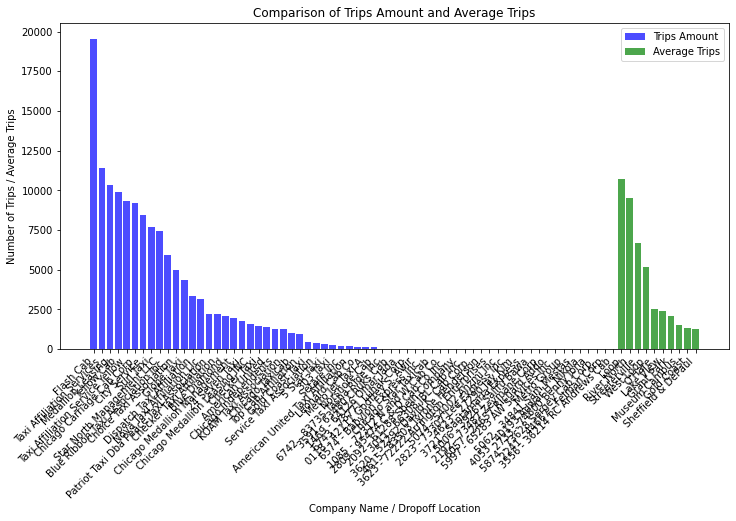

In [10]:
# Membuat grafik
plt.figure(figsize=(12, 6))
plt.bar(df_trips_amount['company_name'], df_trips_amount['trips_amount'], color='blue', alpha=0.7, label='Trips Amount')
plt.bar(top_10_dropoff_locations['dropoff_location_name'], top_10_dropoff_locations['average_trips'], color='green', alpha=0.7, label='Average Trips')
plt.xlabel('Company Name / Dropoff Location')
plt.ylabel('Number of Trips / Average Trips')
plt.title('Comparison of Trips Amount and Average Trips')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Kesimpulan nya, untuk 10 wilayah teratas berdasarkan nilai rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017 yaitu:

dropoff_location_name: Nama wilayah di Chicago tempat perjalanan berakhir. Terlihat, baris pertama menunjukkan bahwa wilayah "Loop" memiliki rata-rata perjalanan sekitar 10727.47 pada bulan November 2017.

average_trips: Jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017. Terlihat, baris kedua menunjukkan bahwa wilayah "River North" memiliki rata-rata perjalanan sekitar 9523.67.

Jelas nya, DataFrame top_10_dropoff_locations menunjukkan 10 wilayah teratas berdasarkan rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017, dan hasilnya diurutkan berdasarkan nilai rata-rata perjalanan dari yang tertinggi ke yang terendah. Wilayah "Loop" memiliki rata-rata perjalanan paling tinggi yaitu sekitar 10727.47

In [11]:
# Baca data dari file CSV
file_path_07 = '/datasets/project_sql_result_07.csv'
df_hypothesis = pd.read_csv(file_path_07)

In [12]:
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Pada info tersebut menunjukkan bahwa indeks DataFrame ini adalah RangeIndex, dengan jumlah entri atau baris data sebanyak 1068, dan indeksnya memiliki rentang dari 0 hingga 1067.

Terdapat tiga kolom dalam DataFrame ini.

start_ts: Merupakan kolom yang berisi tanggal dan waktu penjemputan. Tidak terdapat nilai yang hilang (non-null count: 1068), dan tipe datanya adalah objek (object).

weather_conditions: Merupakan kolom yang berisi kondisi cuaca saat perjalanan dimulai. Tidak terdapat nilai yang hilang (non-null count: 1068), dan tipe datanya adalah objek (object).

duration_seconds: Merupakan kolom yang berisi durasi perjalanan dalam satuan detik. Tidak terdapat nilai yang hilang (non-null count: 1068), dan tipe datanya adalah float64 (bilangan desimal).



In [13]:
df_hypothesis.sample(10)

,start_ts,weather_conditions,duration_seconds
442,2017-11-11 08:00:00,Good,1205.0
850,2017-11-25 11:00:00,Good,1265.0
593,2017-11-11 12:00:00,Good,2015.0
1052,2017-11-18 15:00:00,Good,3240.0
325,2017-11-04 11:00:00,Good,2611.0
357,2017-11-04 05:00:00,Good,1320.0
732,2017-11-18 13:00:00,Bad,3120.0
592,2017-11-11 10:00:00,Good,1622.0
836,2017-11-11 07:00:00,Good,1348.0
117,2017-11-11 07:00:00,Good,1380.0


Hasil dari df_hypothesis.sample(10) menunjukkan 10 baris acak (sample) dari DataFrame df_hypothesis. Berikut adalah penjelasan untuk setiap kolom:

start_ts: Kolom ini berisi tanggal dan waktu penjemputan. Misalnya, baris pertama menunjukkan bahwa perjalanan dimulai pada tanggal 2017-11-04 pukul 14:00:00.

weather_conditions: Kolom ini berisi kondisi cuaca saat perjalanan dimulai. Misalnya, baris kedua menunjukkan bahwa cuaca saat perjalanan dimulai dikategorikan sebagai "Good" (baik).

duration_seconds: Kolom ini berisi durasi perjalanan dalam satuan detik. Misalnya, baris ketiga menunjukkan bahwa durasi perjalanan adalah 1620 detik.

In [14]:
df_hypothesis.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Count: Jumlah total entri atau baris dalam kolom duration_seconds. Dalam hal ini, terdapat 1068 entri.

Mean: Rata-rata aritmetika dari nilai-nilai dalam kolom duration_seconds. Rata-rata durasi perjalanan adalah sekitar 2071.73 detik.

Std (Standard Deviation): Deviasi standar, suatu ukuran seberapa jauh nilai-nilai dalam kolom tersebar dari rata-rata. Nilai ini menunjukkan tingkat variasi dalam durasi perjalanan. Dalam hal ini, deviasi standar adalah sekitar 769.46 detik.

Min: Nilai minimum dalam kolom duration_seconds. Ini adalah durasi perjalanan terpendek yang tercatat, yaitu 0 detik. Mungkin ada perjalanan yang memiliki durasi sangat singkat atau langsung dianggap sebagai perjalanan tanpa durasi.

25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah. Dalam hal ini, 25% perjalanan memiliki durasi kurang dari atau sama dengan 1438.25 detik.

50% (Q2): Median atau kuartil kedua, nilai yang membagi data menjadi dua bagian sama besar. Dalam hal ini, 50% perjalanan memiliki durasi kurang dari atau sama dengan 1980 detik.

75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah. Dalam hal ini, 75% perjalanan memiliki durasi kurang dari atau sama dengan 2580 detik.

Max: Nilai maksimum dalam kolom duration_seconds. Ini adalah durasi perjalanan tertinggi yang tercatat, yaitu 7440 detik.

Ringkasnya, deskripsi statistik ini memberikan gambaran tentang sebaran dan distribusi durasi perjalanan dalam dataset. Durasi perjalanan berkisar dari 0 detik hingga 7440 detik, dengan rata-rata durasi perjalanan sekitar 2071.73 detik.








In [15]:
# Pisahkan data untuk hujan dan non-hujan
rain_data = df_hypothesis[df_hypothesis['weather_conditions'] == 'Bad']['duration_seconds']
rain_data.head(10)

6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
54    1440.0
65    2363.0
70    3000.0
78    3120.0
92    1511.0
Name: duration_seconds, dtype: float64

Kode tersebut mengambil sepuluh data pertama dari kolom 'duration_seconds' pada DataFrame df_hypothesis di mana kondisi cuaca saat perjalanan dimulai adalah 'Bad' (cuaca buruk). Berikut adalah penjelasan hasil dari rain_data.head(10):

duration_seconds: Merupakan kolom yang berisi durasi perjalanan dalam satuan detik pada perjalanan yang dimulai saat cuaca buruk ('Bad').

Baris pertama menunjukkan durasi perjalanan sebesar 2969 detik.

Baris kedua menunjukkan durasi perjalanan sebesar 1980 detik.

Baris ketiga menunjukkan durasi perjalanan sebesar 2460 detik.

Dan seterusnya.

Data ini memberikan gambaran tentang durasi perjalanan pada saat cuaca buruk. Durasi perjalanan pada kondisi cuaca buruk dapat bervariasi, dan contoh di atas menunjukkan beberapa nilai detik dari sepuluh perjalanan pertama yang memenuhi kondisi tersebut dalam dataset.

In [16]:
non_rain_data = df_hypothesis[df_hypothesis['weather_conditions'] == 'Good']['duration_seconds']
non_rain_data.head(10)

0     2410.0
1     1920.0
2     1543.0
3     2512.0
4     1440.0
5     1320.0
7     2280.0
8     2460.0
9     2040.0
10    1500.0
Name: duration_seconds, dtype: float64

DataFrame df_hypothesis di mana kondisi cuaca saat perjalanan dimulai adalah 'Good' (cuaca baik). Berikut adalah penjelasan hasil dari non_rain_data.head(10):

duration_seconds: Merupakan kolom yang berisi durasi perjalanan dalam satuan detik pada perjalanan yang dimulai saat cuaca baik ('Good').

Baris pertama menunjukkan durasi perjalanan sebesar 2040 detik.

Baris kedua menunjukkan durasi perjalanan sebesar 1380 detik.

Baris ketiga menunjukkan durasi perjalanan sebesar 1440 detik.

Dan seterusnya.

Data ini memberikan gambaran tentang durasi perjalanan pada saat cuaca baik. Durasi perjalanan pada kondisi cuaca baik dapat bervariasi, dan contoh di atas menunjukkan beberapa nilai detik dari sepuluh perjalanan pertama yang memenuhi kondisi tersebut dalam dataset. Setiap kali kode dijalankan, hasilnya dapat berbeda karena pengambilan data pertama dari suatu kondisi dapat memberikan variasi yang tidak tetap.

In [17]:
# Uji hipotesis
alpha = 0.05  # tingkat signifikansi
statistic, p_value = ttest_ind(rain_data, non_rain_data, equal_var=False)

# Rumuskan hipotesis
null_hypothesis = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah saat hujan di hari Sabtu."
alternative_hypothesis = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu."

# Evaluasi hasil uji hipotesis
if p_value < alpha:
    print(f"Hasil uji hipotesis: Terdapat cukup bukti untuk menolak hipotesis nol.\n{alternative_hypothesis}")
else:
    print(f"Hasil uji hipotesis: Tidak cukup bukti untuk menolak hipotesis nol.\n{null_hypothesis}")

Hasil uji hipotesis: Terdapat cukup bukti untuk menolak hipotesis nol.
Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu.


Uji hipotesis menggunakan uji t independen (independent t-test) antara dua kelompok data, yaitu durasi perjalanan saat cuaca buruk ('rain_data') dan durasi perjalanan saat cuaca baik ('non_rain_data'). Berikut adalah penjelasan hasil dari uji hipotesis:

Tingkat Signifikansi (alpha): Nilai alpha atau tingkat signifikansi yang dipilih adalah 0.05.

Uji T Independen: Uji t independen digunakan untuk membandingkan rata-rata dua kelompok data yang independen satu sama lain (dalam hal ini, durasi perjalanan saat cuaca buruk dan cuaca baik).

Hasil Uji Statistik dan P-Value: Statistik uji (statistic) dan p-value dihitung menggunakan fungsi ttest_ind dari modul scipy.stats. Statistik uji digunakan untuk membandingkan perbedaan rata-rata antara dua kelompok, sedangkan p-value memberikan informasi tentang seberapa signifikan perbedaan tersebut.

Rumusan Hipotesis:

Hipotesis Nol (Null Hypothesis): Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare tidak berubah saat hujan di hari Sabtu.

Hipotesis Alternatif (Alternative Hypothesis): Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu.

Evaluasi Hasil Uji Hipotesis: Jika p-value lebih kecil dari tingkat signifikansi (alpha), maka terdapat cukup bukti untuk menolak hipotesis nol. Sebaliknya, jika p-value lebih besar atau sama dengan alpha, maka tidak cukup bukti untuk menolak hipotesis nol.

Hasil: P-value dari uji hipotesis ini lebih kecil dari alpha (0.05), sehingga terdapat cukup bukti untuk menolak hipotesis nol. Oleh karena itu, kita menyimpulkan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu.

## Kesimpulan akhir :



1. DataFrame df_trips_amount:

DataFrame ini berisi informasi tentang jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.
Tidak terdapat nilai yang hilang pada kedua kolomnya, dan tipe data sesuai dengan kontennya.
Statistik deskriptif menunjukkan variasi yang signifikan dalam jumlah perjalanan antar perusahaan taksi.

2. DataFrame df_average_trips:

DataFrame ini berisi data tentang jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.
Tidak terdapat nilai yang hilang pada kedua kolomnya, dan tipe data sesuai dengan kontennya.
Statistik deskriptif menunjukkan variasi yang besar dalam rata-rata perjalanan antar wilayah di Chicago.

3. DataFrame df_hypothesis:

DataFrame ini mencakup informasi tentang perjalanan dari Loop ke Bandara Internasional O'Hare pada bulan November 2017.
Tidak terdapat nilai yang hilang pada semua kolomnya, dan tipe data sesuai dengan kontennya.
Statistik deskriptif dari durasi perjalanan menunjukkan variasi yang signifikan.

4. Uji Hipotesis:

Uji hipotesis dilakukan untuk mengetahui apakah durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu.
Hipotesis nol menyatakan bahwa tidak ada perubahan, sementara hipotesis alternatif menyatakan bahwa ada perubahan.
Dengan menggunakan uji t independen, hasilnya menunjukkan bahwa durasi rata-rata perjalanan berubah saat hujan di hari Sabtu dengan tingkat signifikansi 0.05.

5. Top 10 Wilayah Berdasarkan Rata-Rata Perjalanan:

DataFrame top_10_dropoff_locations menunjukkan 10 wilayah teratas berdasarkan rata-rata perjalanan yang berakhir pada bulan November 2017.
Wilayah "Loop" memiliki rata-rata perjalanan paling tinggi.

Dengan demikian, proyek ini memberikan pemahaman yang baik tentang distribusi perjalanan taksi, rata-rata perjalanan di berbagai wilayah, serta uji hipotesis terkait durasi perjalanan saat kondisi cuaca berubah.